# Deep Learning Notes 1 
## Includes: Mathematical neuron, Multi-layered perceptron, SGD, Sequential

One of the most popular definitons of Machine Learning is by [Mitchell](#Mitchell97):

> A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P if its performance at tasks in T, as measured by P, improves with experience E.

We can unpick this definition by looking at what is meant by _experience E, tasks T_ and _performance measure P_. 

*Tasks T.* One of the strengths of deep learning models are their flexibility to solve a wide range of problem tasks. Typical tasks could include:

* Classification
* Regression
* Clustering
* Anomaly detection
* Density estimation

*Experience E.* This relates to the type of data that is used to accomplish the given task. The data could be labelled examples (such as images of digits and their corresponding labels) or unlabelled examples. A typical assumption is that the data is independent and identically distributed (iid).

*Performance measure P.* Given a learning task T and experience E, we then need a way of measuring how well a machine learning system accomplishes the task T. For example, for a regression task this could be the mean squared error, or for a binary classification task we could use binary cross entropy, or area under the ROC curve.

Here is a reminder of how to derive cost functions (through Maximum likelihood): https://allenkunle.me/deriving-ml-cost-functions-part1

#### Overfitting and underfitting

A common issue in all machine learning models is underfitting vs overfitting. 
* Overfitting is when a model becomes too specific to the training data (model capacity is too high, then it can fit idiosyncrasies in training data) and doesn't generalise well beyond it. It is characterised by having a good performance measure on the training data and much worse performance on the test data. 
* Underfitting is just the reverse; it is where a model does not manage to fit the training (or test) data well. It is characterised by a similar poor performance on both training and test sets.

One way to reduce overfitting os through regularisation techniques, which seek to constrain the model capacity.

For example, for a linear model of the form

$$
f(\mathbf{x}) = \sum_j w_j \phi_j(\mathbf{x})
$$

a typical regularisation is to add a sum of squares penalty term to discourage the weights $w_j$ from getting too large. Specifically, instead of minimising the mean squared error (2), we minimise the loss function

$$
\begin{equation}
L(\mathbf{w}, \alpha) = \frac{1}{| \mathcal{D}_{train} |}\left(\sum_{x_i, y_i\in \mathcal{D}_{train}}(f(x_i) - y_i)^2 
+ \alpha\sum_j w_j^2\right), \tag{3}
\end{equation}
$$

where the coefficient $\alpha$ is a hyperparameter.

## Mathematical neuron
consider a simple model of a neuron in the brain, that receive a set of inputs, which are weighted and summed before being passed through an activation function:


<img src="figures/mathematical_neuron.png" alt="Artificial neuron" style="width: 500px;"/>
<center>Sketch of a mathematical neuron.</center>


$$
\begin{equation}
y_k = \sigma\left(\sum_j w_{kj}x_j + b_k\right) \tag{4}
\end{equation}
$$


In the above, the inputs to the neuron are denoted by $x_j$, the weights $w_{kj}$, bias $b_k$ and activation function $\sigma$. the output is $y_k$. The weights and bias are parameters that need to be tuned for the given task.

The first artificial neuron was developed by [McCulloch and Pitts](#McCullochPitts43), which used a simple threshold activation function (step function) only on binary inputs, and produce a binary output.

#### Tensors

Tensors are basically multi-dim arrays. When we start to implement models, these models will be represented as large acyclic graphs. where the nodes are the computations in the graph and these computations are encasulated in these tensor objects.
so the info is flowing through this graph, carried by the tensors!

A rank-0 tensor is a scalar. A rank-1 tensor is a vector. rank-2 tensor is a matrix.

In [2]:
import tensorflow as tf

In [4]:
#single dim of length three
a = tf.constant([1,2,3])
print(a)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [24]:
#rank 2 tensor - which has 2 rows and three columns
b = tf.constant([[1.2,3.45,6], [-5,8.6,9.675]])
print(b)
print('')
print(tf.rank(b))

tf.Tensor(
[[ 1.2    3.45   6.   ]
 [-5.     8.6    9.675]], shape=(2, 3), dtype=float32)

tf.Tensor(2, shape=(), dtype=int32)


In [41]:
#ones, zeros and random

zeros = tf.zeros((2,4))
ones = tf.ones((2,4))
random_norm = tf.random.normal((2,4)) # this creates a tensor whose values are sampled from a random normal dist
random_int = tf.random.uniform(shape=(2,4), minval=0, maxval=10, dtype='int32') #randomly sampled intergers in zero to nine

print(zeros)
print(ones)
print(random_norm)
print(random_int)

tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(2, 4), dtype=float32)
tf.Tensor(
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]], shape=(2, 4), dtype=float32)
tf.Tensor(
[[-1.4191288   0.38534674 -0.1287416  -1.863715  ]
 [-0.8315166  -0.9169981   0.17198105  1.3583112 ]], shape=(2, 4), dtype=float32)
tf.Tensor(
[[0 0 9 2]
 [7 0 0 5]], shape=(2, 4), dtype=int32)


In [10]:
# Compute matrix-vector product

# b=(2,3) matrix
# a=(3,) <-- a is not a matrix it is an array of dim 1 and length 3

# we have to recast a because a is of type int32 whereas b is of type float32   
a = tf.cast(a, tf.float32)

# the axes argument is asking which dimensions of both tensors do we want to contract over? 
# axes=1 means uses the last dimention of b and the 1st dim of a. This coresponds to regular matrix multiplication
tf.tensordot(b,a,axes=1) 

# you can also past a list of the dimensions you wish to contract over. 
# In this case contracting over dimension index 1 for b which is 3 and dimension index 0 for a which is 3. 
# Again this is just normal matrix multiplication! 
tf.tensordot(b,a, axes=[[1], [0]])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([26.1     , 41.225002], dtype=float32)>

Useful operations to manipulate Tensor shapes are `tf.expand_dims`, `tf.squeeze` and `tf.reshape`.

In [17]:
#shape manipulation 

print('a: ', a.shape)

# Add/remove an extra dimension to a Tensor
expand = tf.expand_dims(a, 1) # expand a by one dimension at index 1 
print(f'expand: {expand.shape}')

squeeze = tf.squeeze(expand,1) #this does the opposite - removes a dimension
print(f'squeeze: {squeeze.shape}')

a:  (3,)
expand: (3, 1)
squeeze: (3,)


In the case of two rank-2 Tensors or higher, we can use the `tf.linalg.matmul` function.

In [36]:
print('rank of expand: ', tf.rank(expand)) # expand is now a rank two tensor - which has three rows and one column
print('')
print('expand: ', expand)
print('')
print('b: ', b)

#now we can multiply 
# b - rank 2 tensor with (2 rows 3 columns)
# expand - rank 2 tensor with (3 rows, 1 column)
tf.linalg.matmul(b,expand)

# we can reshape frim [2, 1] to [1,2]
tf.reshape(tf.linalg.matmul(b,expand), [1,2])

#final result is a rank two tensor with (1 row, 2 columns)

rank of expand:  tf.Tensor(2, shape=(), dtype=int32)

expand:  tf.Tensor(
[[1.]
 [2.]
 [3.]], shape=(3, 1), dtype=float32)

b:  tf.Tensor(
[[ 1.2    3.45   6.   ]
 [-5.     8.6    9.675]], shape=(2, 3), dtype=float32)


<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[26.1     , 41.225002]], dtype=float32)>

#### Variables
Tensors are *immutable objects*; that is, their state cannot be modified. The operations they encapsulate (or the values of a constant Tensor) are fixed. Variables are special kinds of Tensors that have *mutable state*, so their values can be updated. This is useful for parameters of a model, such as the weights and biases in a neural network.

In [42]:
# Create a TensorFlow Variable

# in order to create a tensor vairable we have to first give it inital values.
inital_values = tf.random.normal((2,2))

u = tf.Variable(inital_values)
u

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.6681279, 1.7196432],
       [1.2732044, 0.1635584]], dtype=float32)>

compared to Tensors, Variables come with extra methods for updating their state, such as `assign`, `assign_add` and `assign_sub`.

In [44]:
#assign new values to Variable
new_values = 2. * tf.ones((2,2))

u.assign(new_values) # assign the vairable to the new values (so lose orginal values).Must be same type and dims obviously!
u

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [45]:
# Add a value to the Variable - assign_sub to subract values!
increment = tf.constant([[0.,0.], [1.,1.]])
print(increment)

u.assign_add(increment) ## adding zeros to 1st row and 1s to second row
u

tf.Tensor(
[[0. 0.]
 [1. 1.]], shape=(2, 2), dtype=float32)


<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[2., 2.],
       [3., 3.]], dtype=float32)>

## NEURONS

#### McCulloch-Pitts neuron
As an example, we will use Tensors to implement the McCulloch-Pitts neuron for a simple logical function. The McCulloch-Pitts neuron operates on boolean inputs, and uses a threshold activation to produce a boolean output. The function can be written as

$$
f(\mathbf{x}) = 
\begin{cases}
1 \quad \text{if } \sum_i x_i \ge b\\
0 \quad \text{if } \sum_i x_i < b
\end{cases}
$$

what is does is it, takes inputs $x_i$ and sums them, if that sum is greater than or equal to a threshold value , b then it returns 1 else it returns 0


In [49]:
def logical_and(x):
    #takes a single binary input vector x and returns 1 if all the elements are 1 and 0 otherwise 
    return tf.cast(tf.math.greater_equal(tf.reduce_sum(x), tf.reduce_prod(tf.shape(x))), tf.int32)
    

#### The perceptron
The perceptron is also a linear binary classifier, but with more flexible weights. It can be written as the following function

$$
f(\mathbf{x}) = 
\begin{cases}
1 \quad \text{if } \sum_i w_i x_i + b \ge 0\\
0 \quad \text{if } \sum_i w_i x_i + b < 0
\end{cases}
$$

so, just like before if the weighted sum of inputs (w_j x_j) plus a bias, b is greater or equal to zero, then its equal to 1 and 0 otherwise.

In [50]:

# Use variables for the weights and bias (so we can update there values) 
# Use tensors for the inputs (which remain constant)

weights = tf.Variable(tf.constant([1., 0.5]), name='Weights')
bias = tf.Variable(tf.constant([-0.5]), name='Bias')


In [51]:
# Define the perceptron classifier
def perceptron(x):
    return tf.math.greater_equal(tf.tensordot(x, weights, axes=1) + bias, 0.) # leaving this output as a bolean 

#remember that matrix multiplication is the same as the sum of the products, ie (1,2,3)@(3,2,1).T = 1.3 + 2.2 + 3.1 

In [61]:
#random data points

data = tf.random.normal((100,2)) # rank 2 tensor with 100 rows and 2 columns

In [63]:
def perceptron_plot(preds):
    positive_class = data[preds] # All the Trues
    negative_class = data[~preds] # ~ is NOT ie NOT True = False (Tilda)

    plt.scatter(positive_class[:, 0], positive_class[:, 1], alpha=0.5, label='Positive')
    plt.scatter(negative_class[:, 0], negative_class[:, 1], alpha=0.5, label='Negative')
    plt.title('Perceptron Classifications')
    plt.legend()
    plt.show()

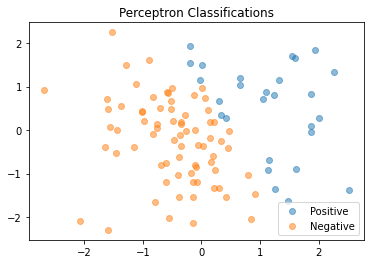

In [66]:
# Plot the points coloured by class prediction

import matplotlib.pyplot as plt

#preds are boolian (True/False) based on perceptron classifer
preds = perceptron(data)
#plot these classifications
perceptron_plot(preds)

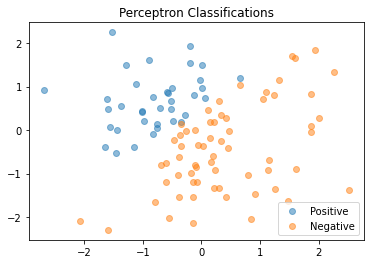

In [67]:
#if I use different values for the weights and bias, then we'll get a different decision boundary.

# Update the weights and bias and re-plot
weights.assign_sub([1.2, 0.3])
bias.assign_add([0.4])

preds = perceptron(data)
#plot these classifications
perceptron_plot(preds)

<a class="anchor" id="sgd"></a>
## Stochastic gradient descent

The second wave of interest in neural networks in the 80s was driven in large part by the connectionist movement (see e.g. [Rumelhart et al (1986a)](#Rumelhart86a)), which focused on the concept of intelligent behaviour arising out of many simple computations composed together, with knowledge being distributed across many units. Smooth activation functions were increasingly studied, as they allowed gradient-based methods such as stochastic gradient descent (SGD, [Robbins & Monro 1951](#Robbins51)) to be used in the optimisation of model parameters. 


So if we look back at the mathematical neutron and the perceptron:

<img src="figures/mathematical_neuron.png" alt="Artificial neuron" style="width: 500px;"/>
<center>Sketch of a mathematical neuron.</center>

they use a linear (or affine -- +b) transformation of the inputs x and then threshold the result to give a binary output y, (0,1). So the activation function here would be sigma $\sigma$ which is a step function ( = 1 if the transformation is greater than or equal to zero or 0 otherwise) and the threshold is dependent on b (cause can take the b over the greater than or less than)
the problem with using the step function is that it is discontinous at the jump and therefore not differentiable!

In [2]:
import tensorflow as tf

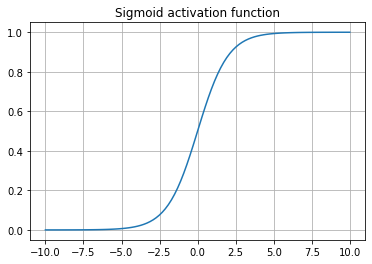

In [3]:
# Plot the sigmoid function using the TensorFlow implementation

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = tf.keras.activations.sigmoid(x)
plt.grid()
plt.plot(x, y)
plt.title("Sigmoid activation function")
plt.show()

Note that: linear regression and logistic regression can both be viewed as artificial neuron models, with linear (or no) activation function and sigmoid activation function respectively.

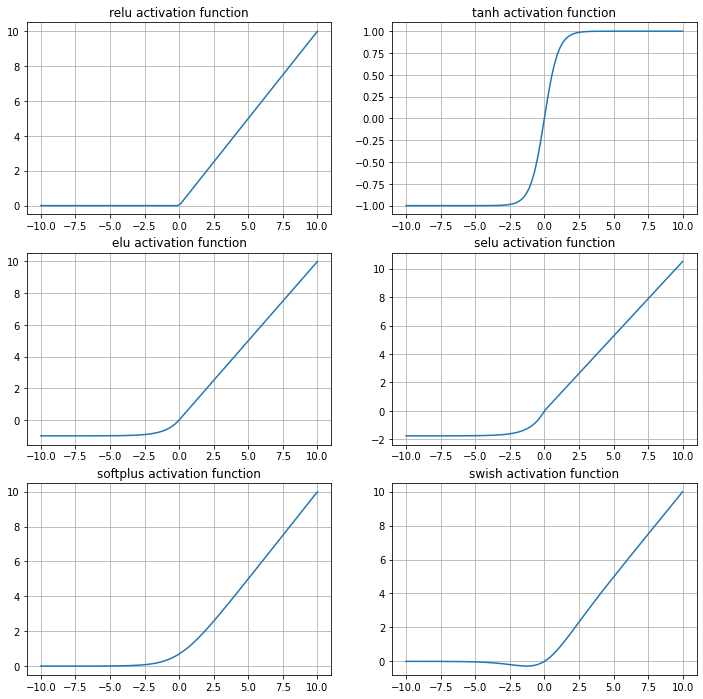

In [4]:
# Plot example activation functions

x = np.linspace(-10, 10, 100)
fig = plt.figure(figsize=(12, 12))
for i, activation in enumerate(['relu', 'tanh', 'elu', 'selu', 'softplus', 'swish']):
    row = (i % 2) + 1
    col = (i // 2) + 1
    fig.add_subplot(3, 2, i + 1)
    plt.grid()
    plt.title("{} activation function".format(activation))
    plt.plot(x, getattr(tf.keras.activations, activation)(x))
plt.show()

#### Gradient descent

Suppose we have constructed our neural network model, which we represent as the function $f_\theta:\mathbb{R}^D\mapsto Y$, where $Y$ is the target space (e.g. $\mathbb{R}$ or $[0, 1]$). Suppose also that we have defined a suitable loss function 

$$
L(\theta; \mathcal{D}_{train}) := \frac{1}{|\mathcal{D}_{train}|} \sum_{x_i, y_i\in\mathcal{D}_{train}} l(y_i, f_\theta(x_i)),
$$

where $l(y_i, f_\theta(x_i))$ is the per-example loss (I.e. just our prediction minus actual value). Then the gradient $\nabla_\theta L (\theta_0; \mathcal{D}_{train})$ evaluated at $\theta_0$ defines the direction of steepest ascent in parameter space at the point $\theta$. 

The gradient descent algorithm takes an initial guess for the parameters $\theta_0$ and updates the parameter values according to the rule

$$
\theta_{t+1} = \theta_{t} - \eta \nabla_\theta L(\theta_t; \mathcal{D}_{train}),\qquad t\in\mathbb{N}_0
$$

where $\eta_t>0$ is a small learning rate which may depend on $t$. For a suitably chosen $\eta_t$, the iterates $L(\theta_t; \mathcal{D}_{train})$, $t\in\mathbb{N}_0$ converge to a local minimum.

#### Stochastic gradient descent

Note that computing $\nabla_\theta L(\theta; \mathcal{D}_{train})$ as above requires computing the gradients of the per-example loss for every element in the training set. For large datasets (and large models) this can be prohibitively expensive. 

Stochastic gradient descent provides a cheaper estimate of the full gradient, by computing the gradient on a minibatch of data points, instead of the full dataset (a sample of 32 or 64 data pts from the data set). In particular, we evaluate the gradient 

$$
L(\theta; \mathcal{D}_m) = \frac{1}{M} \sum_{x_i, y_i\in\mathcal{D}_m} l(y_i, f_\theta(x_i)),
$$

where $\mathcal{D}_m$ is a randomly sampled minibatch of training data points, $M = |\mathcal{D}_m|$ is the size of the minibatch (typically much smaller than $|\mathcal{D}_{train}|$). We then use the gradient $\nabla_\theta L(\theta_t; \mathcal{D}_m)$ to update the parameters

$$
\theta_{t+1} = \theta_{t} - \eta \nabla_\theta L(\theta_t; \mathcal{D}_m),\qquad t\in\mathbb{N}_0
$$

This update provides a stochastic approximation to the true gradient which is far more efficient to compute, and provides a huge speed up in the training process for large datasets. Only problem is that sampling introduces noise, but not really a problem!

<a class="anchor" id="mlp"></a>
## Multilayer perceptrons

The simplest type of deep learning model is the **multilayer perceptron**, also known as a **feedforward network**. This type of neural network can be viewed as an architecture consisting of layers of mathematical neurons, linked together in a directed acyclic graph.

#### MLP with single hidden layer
A key property of deep learning models is the fact that they are _compositional_ instead of _additive_. Where as linear regression models (or logistic regression, kernel regression) increase complexity by adding extra basis functions $\phi_i$ in the expansion

$$
f(\mathbf{x}) = \sum_{i} w_i \phi_i(\mathbf{x}),
$$

deep learning models increase complexity by composing multiple simple functions $\varphi_k$ together:

$$
f(\mathbf{x}) = \varphi_L(\varphi_{L-1}(\ldots\varphi_2(\varphi_1(\mathbf{x}))\ldots )).
$$

The functions $\varphi_k$ are defined to be affine (linear but +b) transformations followed by an element-wise activation function. An example is the MLP with a single hidden layer: 

$$
\begin{align}
h_j^{(1)} &= \sigma\left( \sum_{i=1}^D w^{(0)}_{ji}x_i + b_j^{(0)} \right),\qquad j=1,\ldots,n_h, \tag{5}\\
\hat{y} &= \sigma_{out}\left( \sum_{i=1}^{n_h} w^{(1)}_{i}h^{(1)}_i + b^{(1)} \right). \tag{6}\\
\end{align}
$$

In the above, $\mathbf{x}\in\mathbb{R}^D$ is an example input, $n_h\in\mathbb{N}$ is the number of hidden units in the network, $\sigma, \sigma_{out}:\mathbb{R}\mapsto\mathbb{R}$ are activation functions, $w^{(0)}_{ji}\in\mathbb{R}$ and $w^{(1)}_{ji}\in\mathbb{R}$ are weights, and $b_j^{(0)}\in\mathbb{R}$ and $b^{(1)}\in\mathbb{R}$ are biases.

Following (5) and (6) we also define the **pre-activations** $a_j^{(1)} := \sum_{i=1}^D w^{(0)}_{ji}x_i + b_j^{(0)}$ (This before its fed into activation function!). Correspondingly, the $h_j^{(1)}$ are referred to as the **post-activations** (or frequently, just **activations**)(what you get after you have fed it into activation function this is (5) $a_j$'s are what is in (5)).

This construction can be summarised in the following diagram.

<img src="figures/ann_single_hidden_layer_outline.png" alt="MLP with a single hidden layer" style="width: 500px;"/>
<center>Multilayer perceptron with a single hidden layer consisting of three neurons.</center>

We will usually write equations (5) and (6) in the more concise (vector) form:

$$
\begin{align}
\mathbf{h}^{(1)} &= \sigma\left( \mathbf{W}^{(0)}\mathbf{x} + \mathbf{b}^{(0)} \right),\tag{7}\\
\hat{y} &= \sigma_{out}\left( \mathbf{w}^{(1)}\mathbf{h}^{(1)} + b^{(1)} \right), \tag{8}
\end{align}
$$

where $\mathbf{x}\in\mathbb{R}^D$, $\mathbf{W}^{(0)}\in\mathbb{R}^{n_h\times D}$, $\mathbf{b}^{(0)}\in\mathbb{R}^{n_h}$, $\mathbf{h}^{(1)}\in\mathbb{R}^{n_h}$, $\mathbf{w}^{(1)}\in\mathbb{R}^{1\times n_h}$, $b^{(1)}\in\mathbb{R}$ and we overload notation with the activation functions $\sigma, \sigma_{out}: \mathbb{R}\mapsto\mathbb{R}$ by applying them element-wise in the above.

This hidden layer is a type of neural network layer that is often referred to as a **dense** or **fully connected** layer.

#### MLP with multiple hidden layers
More generally, for an MLP with $L$ hidden layers, we have

$$
\begin{align}
\mathbf{h}^{(0)} &:= \mathbf{x}, \tag{9} \\ 
\mathbf{h}^{(k)} &= \sigma\left( \mathbf{W}^{(k-1)}\mathbf{h}^{(k-1)} + \mathbf{b}^{(k-1)} \right),\qquad k=1,\ldots, L,\tag{10}\\
\hat{y} &= \sigma_{out}\left( \mathbf{w}^{(L)}\mathbf{h}^{(L)} + b^{(L)} \right), \tag{11}
\end{align}
$$

where $\mathbf{W}^{(k)}\in\mathbb{R}^{n_{k+1}\times n_k}$, $\mathbf{b}^{(k)}\in\mathbb{R}^{n_{k+1}}$, $\mathbf{h}^{(k)}\in\mathbb{R}^{n_k}$, and we have set $n_0 := D$, and $n_k$ is the number of units in the $k$-th hidden layer.

The following diagram shows the MLP architecture with two hidden layers.

<img src="figures/ann_two_hidden_layers.png" alt="MLP with a two hidden layers" style="width: 700px;"/>
<center>Multilayer perceptron with a two hidden layers.</center>

The hidden layers inside a deep network can be viewed as *learned feature extractors*. The weights of the network learn to encode the data in such a way as to represent progressively more complex or abstract features of the data that are useful for solving the problem task at hand. This hierarchy of representations is a core property of the expressive power of deep learning models ([Rumelhart et al 1986b](#Rumelhart86b)).!!!!!!!!!!!!!!


its very simple:
* first we have an imput layer
* these imputs are then fed into the model (pre-activation)
* these pre-activations are then fed into activation function (post activation)
* this cycle repeated based on number of hidden layers

then for the final layer

* we send the pre-activations (the postactivations of the final hidden layer) through a activation function to get $y$ (prediction)

We can choose the final ouptut activation function based on the requirements of our task.
* if we want to constrain the output to be positive then this can be achieved by passing the pre-activation through a **softplus** or **exponential** activation function.
* It is common for a sigmoid activation to be used where the output should be interpreted as a probability (as in logistic regression). 
* For target variables that should be constrained to an interval, then a sigmoid or tanh activation can be used followed by a suitable rescaling.
* **softmax**, which is used for multiclass classification models.

softmax is defined as:
$$
\hat{\mathbf{y}}_j := \text{softmax}(\mathbf{a}^{(L+1)})_j = \frac{\exp (a_j)}{\sum_i \exp (a_i)}.
$$

where $\mathbf{a}^{(L+1)}$ is the pre-activation (fed into the softmax. i.e. the post activation of the last hidden layer)

<a class="anchor" id="sequential"></a>
## The Sequential class

#### The `Dense` layer

We will see how to build MLP models using the `Dense` layer class from TensorFlow. This class implements the layer transformation $
\mathbf{h}^{(k+1)} = \sigma\left( \mathbf{W}^{(k)}\mathbf{h}^{(k)} + \mathbf{b}^{(k)} \right)
$.

The sequential class builds deep learning models using a list/sequence of layers

In [6]:
# Create a Dense layer
from tensorflow.keras.layers import Dense 

# here my dense layer has 4 neurons and will be passed through the sigmoid activation function
Dense_layer = Dense(4, activation='sigmoid') 

TensorFlow models are designed to process batches of data at once, and always expect inputs to have a batch dimension in the first axis. For example, a batch of 16 inputs, each of which is a length 4 vector, should have a shape `[16, 4]`.

In [8]:
#create some input - MUST include batch dimension, which tf reads as first dimension by default 
x = tf.ones((2,6)) # Batch_dim = 2, data_size = arrays length 6

# call the dense layer on this input to get the output y
y = Dense_layer(x) 
y

#all we have done here is take our inputs, fed them into our dense layer (which contains 4 neurons and a sigmoid activation)

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[0.59140617, 0.6373887 , 0.23922175, 0.19881353],
       [0.59140617, 0.6373887 , 0.23922175, 0.19881353]], dtype=float32)>

In [12]:
print(x) # this is two batches of data of length 6

tf.Tensor(
[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]], shape=(2, 6), dtype=float32)


In [13]:
# Inspect the layer parameters

Dense_layer.variables

#here we have the weights, which is a (6,4) rank-2 tensor(matrix) because our model is x_j x w_j
# the bias b which is added to the above multiplication is (4,) rank 1 tensor of length 4

[<tf.Variable 'dense/kernel:0' shape=(6, 4) dtype=float32, numpy=
 array([[-0.5735393 , -0.5602927 , -0.25376713, -0.02887756],
        [-0.44936243,  0.36884987,  0.7381233 ,  0.22395599],
        [ 0.11534929,  0.08364779, -0.48226342,  0.15722358],
        [ 0.52535903,  0.77426994, -0.5498039 , -0.6328366 ],
        [ 0.5915582 ,  0.2045145 , -0.0127511 , -0.6068959 ],
        [ 0.16041666, -0.30694097, -0.5964886 , -0.50629616]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]

## The base `Layer` class - Low Level

The `Dense` class inherits from the base [`Layer` class](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer), which is core to the high level Keras API in TensorFlow. `Layer` objects encapsulate a state (the layer parameters) and the computation that is carried out by the layer. 

An example implementation of an affine transformation layer is shown below as a subclass of `Layer`.

In [15]:
# Create an Affine layer class
from tensorflow.keras.layers import Layer #importing the base (superclass) called layers

class Affine(Layer):
    
    def __init__(self, units, input_dim, name='affine'): #units=num_neurons
        #call the superclass Layer, so that our class has access not all the methods in layer
        super(Affine, self).__init__(name=name) 
        
        #create a counter variable
        self.counter = tf.Variable(0, dtype=tf.int32, name='counter', trainable=False) 
        
        #initialise our weights to create a weight Variable
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(initial_value=w_init(shape=(input_dim, units), dtype='float32'), 
                             trainable=True, name='Kernal') 
        #initalise and create a bias Variable
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(initial_value=b_init(shape=(units,), dtype='float32'), 
                             trainable=True, name='bias')
        
        #our initaliser is done. All it does is call the super(base) class initilier and creates the vairables it needs
        
    def call(self, inputs): 
        # the computation that this layer works out is called in the call method.
        # note: imputs already has the batch dim included
        
        #calculate the affine transformation
        self.counter.assign_add(1) #increment counter
        return tf.matmul(inputs, self.w) + self.b

In [18]:
# Create an INSTANCE of the Affine layer class
affine = Affine(units=3, input_dim=2)

#show all the variables in our affine layer
affine.weights

[<tf.Variable 'Kernal:0' shape=(2, 3) dtype=float32, numpy=
 array([[ 0.01779776, -0.05491486, -0.02018923],
        [-0.05126565, -0.07170267, -0.04086601]], dtype=float32)>,
 <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>,
 <tf.Variable 'counter:0' shape=() dtype=int32, numpy=0>]

In [20]:
# CALL the affine layer on an input

affine(inputs=tf.ones([1, 2])) #batch dim=1 length=2

#as expected the output is a (1,3) tensor - 1 for the batch size and 3 for the number of neurons in our data

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.0334679 , -0.12661752, -0.06105524]], dtype=float32)>

Note that for our `Affine` layer class we need to supply both input and output dimensions, but for the `Dense` layer class the input dimension is inferred when the layer is first called. 

we can change this by creating the build method
It is good practice to defer creation of the weights using the `build` method:

In [21]:
# Create an Affine layer class that defers creation of the weights 

class NewAffine(Layer):
    
    def __init__(self, units, name='affine'): #no longer have input dimension
        #call superclass initialiser
        super(NewAffine, self).__init__(name=name)
        #create class variable 'units'- to store the number of neurons
        self.units = units
        
    def build(self, input_shape): # This build method will only be called once the layer needs to be built
        
        # add_weight is a method in the Layer (superclass) which adds/creates a new variable
        # we extract the input dim from the input shape (size of the last dim)
        self.w = self.add_weight(shape=(input_shape[-1], self.units), initializer='random_normal') 
        self.b = self.add_weight(shape=(self.units,), initializer='zeros')
        
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [22]:
# Create an INSTANCE of the Affine layer class

new_affine = NewAffine(units=3)

In [24]:
# CALL the affine layer on an input

new_affine(inputs=tf.ones([1,2]))

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 0.07746232, -0.00990516, -0.02305698]], dtype=float32)>

In [25]:
# Inspect the weights
new_affine.weights


[<tf.Variable 'affine/Variable:0' shape=(2, 3) dtype=float32, numpy=
 array([[ 0.04170811, -0.02602248,  0.01595213],
        [ 0.0357542 ,  0.01611732, -0.03900911]], dtype=float32)>,
 <tf.Variable 'affine/Variable:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

## MLP model - Sequential

To construct an MLP model, we stack multiple `Dense` layers together by passing them in a list to the `Sequential` API.

In [1]:
import tensorflow as tf

In [2]:
# Build an MLP model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

mlp = Sequential([
    Dense(4, activation='relu', name='dense1'),
    Dense(4, activation='relu', name='dense2'),
    Dense(3, activation=None, name='dense3')
], name='First_MLP')

In [3]:
# Call the model on an input to create the weights

x = tf.random.normal((2, 6)) # rank 2 tensor - batch_dim=2 and length of each batch is rank-1 tensor of length 6
y = mlp(x)

In [4]:
# Inspect the model parameters
mlp.weights
#these are all of the weights in all of the layers

[<tf.Variable 'dense1/kernel:0' shape=(6, 4) dtype=float32, numpy=
 array([[ 0.10668528,  0.12331426, -0.4228247 ,  0.05566555],
        [ 0.09438884, -0.11378431, -0.7389608 , -0.7003507 ],
        [ 0.74233603,  0.2592615 ,  0.15852171, -0.7346153 ],
        [-0.42248824,  0.15475225, -0.3832018 ,  0.58577406],
        [-0.16476458,  0.09478962, -0.6704607 , -0.4316804 ],
        [-0.24069524,  0.5042815 , -0.7429929 ,  0.6235465 ]],
       dtype=float32)>,
 <tf.Variable 'dense1/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense2/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.14529759, -0.33929342,  0.08180231,  0.3265168 ],
        [ 0.33215636, -0.20987618,  0.7865414 , -0.5695228 ],
        [ 0.0570274 , -0.7888267 ,  0.21568745,  0.5032634 ],
        [-0.16925585, -0.40176475, -0.664049  , -0.4805215 ]],
       dtype=float32)>,
 <tf.Variable 'dense2/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=f

In [5]:
#we can access first layer kernal(weight matrix)
mlp.layers[1].kernel 

<tf.Variable 'dense2/kernel:0' shape=(4, 4) dtype=float32, numpy=
array([[ 0.14529759, -0.33929342,  0.08180231,  0.3265168 ],
       [ 0.33215636, -0.20987618,  0.7865414 , -0.5695228 ],
       [ 0.0570274 , -0.7888267 ,  0.21568745,  0.5032634 ],
       [-0.16925585, -0.40176475, -0.664049  , -0.4805215 ]],
      dtype=float32)>

In [6]:
# Print the model summary

mlp.summary()

Model: "First_MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (2, 4)                    28        
_________________________________________________________________
dense2 (Dense)               (2, 4)                    20        
_________________________________________________________________
dense3 (Dense)               (2, 3)                    15        
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


## Example - Mnist

In [18]:
# Load the MNIST dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

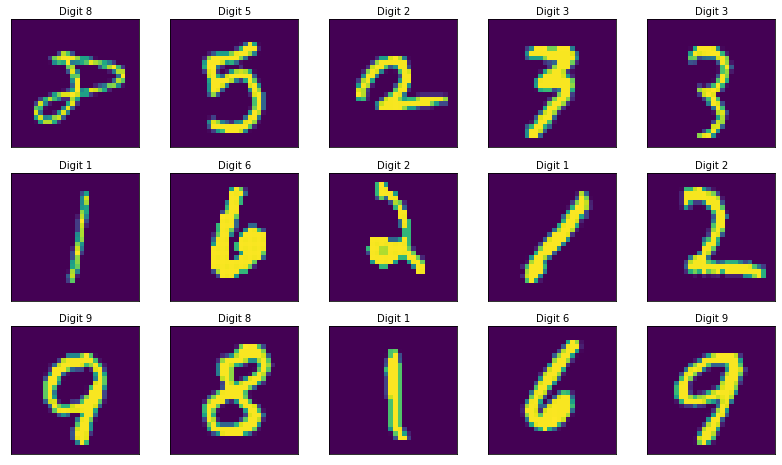

In [19]:
# View a few training data examples

import numpy as np
import matplotlib.pyplot as plt

n_rows, n_cols = 3, 5
random_inx = np.random.choice(x_train.shape[0], n_rows * n_cols, replace=False)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 8))
fig.subplots_adjust(hspace=0.2, wspace=0.1)

for n, i in enumerate(random_inx):
    row = n // n_cols
    col = n % n_cols
    axes[row, col].imshow(x_train[i])
    axes[row, col].get_xaxis().set_visible(False)
    axes[row, col].get_yaxis().set_visible(False)
    axes[row, col].text(10., -1.5, f'Digit {y_train[i]}')
plt.show()

In [20]:
# Create an MNIST classifier model

# input images have dim 28x28. Dense layers requires inputs to be 1 dim array. 
# Flatten unrolls into 1 dim array of length 784 (28x28)
from tensorflow.keras.layers import Flatten 

mnist_model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(64, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax') # last layer needs 10 neurons, 1 for each digit and use soft max (multi-classification)
])

mnist_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


Next we need to compile our model which means defining the loss function and the optimiser to use.

As our labels `y_train` and `y_test` are in sparse form (ie just the interger - whereas categorical_crossentropy would expect an array with a one in the place of the interger that it has been classsed as, known as a one-hot format), we use the `sparse_categorical_crossentropy` loss function. We also will use the stochastic gradient descent (SGD) optimiser.

In [21]:
# Compile the model

# metrics are things you want to keep track of!
mnist_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 



In [22]:
#The image data is filled with integer pixel values from 0 to 255. 
#To facilitate the training, we rescale the values to the interval [0, 1].

# Rescale the image data

x_train = x_train/255
x_test = x_test/255

In [23]:
# Train the model
# epoch is one full pass through the training data
#.fit returns a History object.
# Its History.history attribute is a record of training loss values and metrics values at successive epochs. 
history = mnist_model.fit(x_train, y_train, epochs=10, batch_size=64) 


Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.8769 - accuracy: 0.7772
Epoch 2/10
938/938 [==============================] - 1s 1ms/step - loss: 0.4232 - accuracy: 0.8882
Epoch 3/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3461 - accuracy: 0.9039
Epoch 4/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3097 - accuracy: 0.9125
Epoch 5/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2858 - accuracy: 0.9186
Epoch 6/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2680 - accuracy: 0.9234
Epoch 7/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2529 - accuracy: 0.9280
Epoch 8/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2404 - accuracy: 0.9318
Epoch 9/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2292 - accuracy: 0.9350
Epoch 10/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2192 - accuracy: 0.9373

In [24]:
# Evaluate the model on the test set

mnist_model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2131 - accuracy: 0.9388


[0.21309323608875275, 0.9387999773025513]

In [25]:
# Get predictions from model

preds = mnist_model.predict(x_test)
preds.shape


(10000, 10)

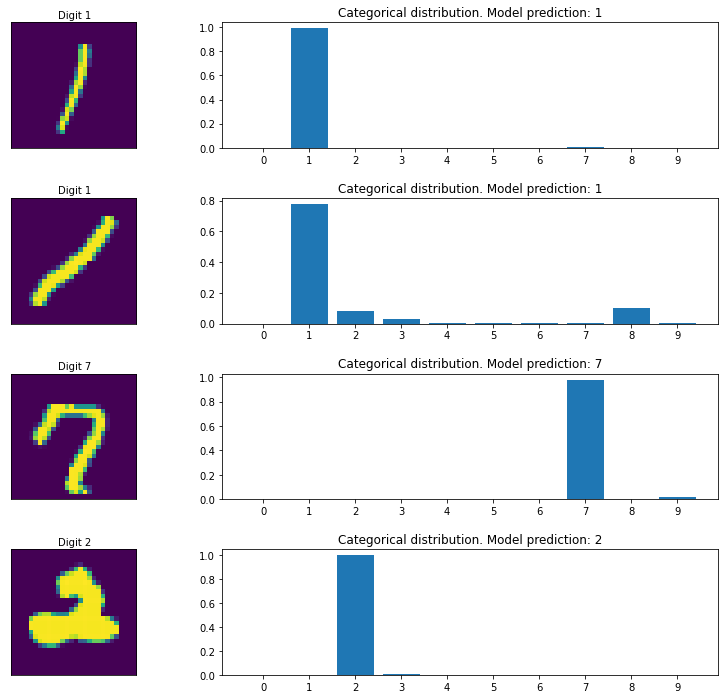

In [26]:
# Plot some predicted categorical distributions

# gets probabilites for 4 randomly selected images from the test set and it 
# is going to display these images along with the predictive distribution of the model
# and the correct label

num_test_images = x_test.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_preds = preds[random_inx, ...]
random_test_images = x_test[random_inx, ...]
random_test_labels = y_test[random_inx, ...]

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(random_preds, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
plt.show()

<a class="anchor" id="references"></a>
### References

<a class="anchor" id="Bishop06"></a>
* Bishop, C. M. (2006), "Pattern Recognition and Machine Learning", Springer-Verlag, Berlin, Heidelberg.
<a class="anchor" id="Clevert16"></a>
* Clevert, D.-A., Unterthiner, T., & Hochreiter, S. (2016), "Fast and Accurate Deep Network Learning by Exponential Linear Units (ELUs)", in *4th International Conference on Learning Representations, {ICLR} 2016", San Juan, Puerto Rico, May 2-4, 2016.
<a class="anchor" id="Hastie01"></a>
* Hastie, T., Tibshirani, R. & Friedman, J. (2001), "The Elements of Statistical Learning", Springer New York Inc., New York, NY, USA.
<a class="anchor" id="Klambauer17"></a>
* Klambauer, G., Unterthiner, T., Mayr, A., & Hochreiter, S. (2017), "Self-Normalizing Neural Networks", *Neural Information Processing Systems (NIPS)*, 971-980.
<a class="anchor" id="McCullochPitts43"></a>
* McCulloch, W. & Pitts, W. (1943), "A Logical Calculus of Ideas Immanent in Nervous Activity", Bulletin of Mathematical Biophysics, **5**, 127-147. 
<a class="anchor" id="Mitchell97"></a>
* Mitchell, T. (1997), "Machine Learning", McGraw-Hill, New York.
<a class="anchor" id="Murphy12"></a>
* Murphy, K. P. (2012), "Machine Learning: A Probabilistic Perspective", The MIT Press.
<a class="anchor" id="Ramachandran18"></a>
* Ramachandran, P., Zoph, B. & Le, Q. V. (2018) "Searching for Activation Functions", arXiv preprint, abs/1710.05941.
<a class="anchor" id="Robbins51"></a>
* Robbins, H. and Monro, S. (1951), "A stochastic approximation method", *The annals of mathematical statistics*, 400–407.
<a class="anchor" id="Rosenblatt58"></a>
* Rosenblatt, F. (1958), "The Perceptron: A Probabilistic Model for Information Storage and Organization in The Brain", Psychological Review, 65-386.
<a class="anchor" id="Rosenblatt61"></a>
* Rosenblatt, F. (1961), "Principles of Neurodynamics. Perceptrons and the Theory of Brain Mechanisms", Defense Technical Information Center.
<a class="anchor" id="Rumelhart86a"></a>
* Rumelhart, D. E., McClelland, J. L. and the PDP Research Group (1986a), "Parallel Distributed Processing: Explorations in the Microstructure of Cognition", MIT Press, Cambridge.
<a class="anchor" id="Rumelhart86b"></a>
* Rumelhart, D. E., Hinton, G., & Williams, R. (1986b), "Learning representations by back-propagating errors", Nature, **323**, 533-536.